<a href="https://colab.research.google.com/github/itsZENR/KNN_RL/blob/main/KNN%26LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет
https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view

In [63]:
#@title Библиотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
url = '/content/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# KNN

In [39]:
X = df.iloc[:, :-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [40]:
y = df.iloc[:, -1:]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

print(np.shape(X_train))
print(np.shape(y_train))

print(np.shape(X_test))
print(np.shape(y_test))

(576, 8)
(576, 1)
(192, 8)
(192, 1)


In [42]:
n_neighbors=[5,10,15,20,25]
scores = []

for i in n_neighbors:
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train, np.ravel(y_train))

  score = model.score(X_test,y_test)
  print("Количество соседей:", i)
  print("Точность:" ,score*100)
  scores.append(score)

Количество соседей: 5
Точность: 74.47916666666666
Количество соседей: 10
Точность: 76.04166666666666
Количество соседей: 15
Точность: 78.125
Количество соседей: 20
Точность: 77.60416666666666
Количество соседей: 25
Точность: 77.08333333333334


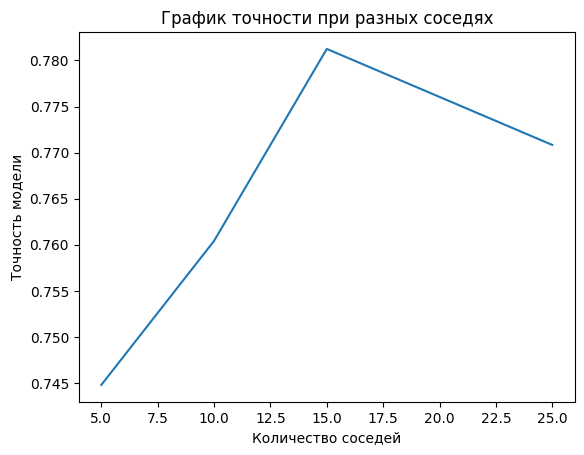

In [43]:
# Строим график
plt.plot(n_neighbors, scores)

# Название графика и осей
plt.title('График точности при разных соседях')
plt.xlabel('Количество соседей')
plt.ylabel('Точность модели')

# Отображение графика
plt.show()

# LinearRegression

In [48]:
X = df[['SkinThickness', 'BMI']]
X

,SkinThickness,BMI
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1
...,...,...
763,48,32.9
764,27,36.8
765,23,26.2
766,0,30.1


In [49]:
y = df[['Insulin']]
y

,Insulin
0,0
1,0
2,0
3,94
4,168
...,...
763,180
764,0
765,112
766,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

print(np.shape(X_train))
print(np.shape(y_train))

print(np.shape(X_test))
print(np.shape(y_test))

(576, 2)
(576, 1)
(192, 2)
(192, 1)


In [52]:
# проводим инициализацию модели
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# получаем метрику качества модели на test выборке
model.score(X_test,y_test)

0.12921811959860263

In [62]:
# печатаем полученные коэффициенты для линейной регрессии
print("Параметры:", model.coef_, model.intercept_)
print("Коэффициент a1:", model.coef_[0][0])
print("Коэффициент a2:", model.coef_[0][1])
print("Коэффициент b:", model.intercept_[0])

Параметры: [[3.12928262 0.60159151]] [-4.00305961]
Коэффициент a1: 3.1292826198667076
Коэффициент a2: 0.60159150504399
Коэффициент b: -4.003059606699367


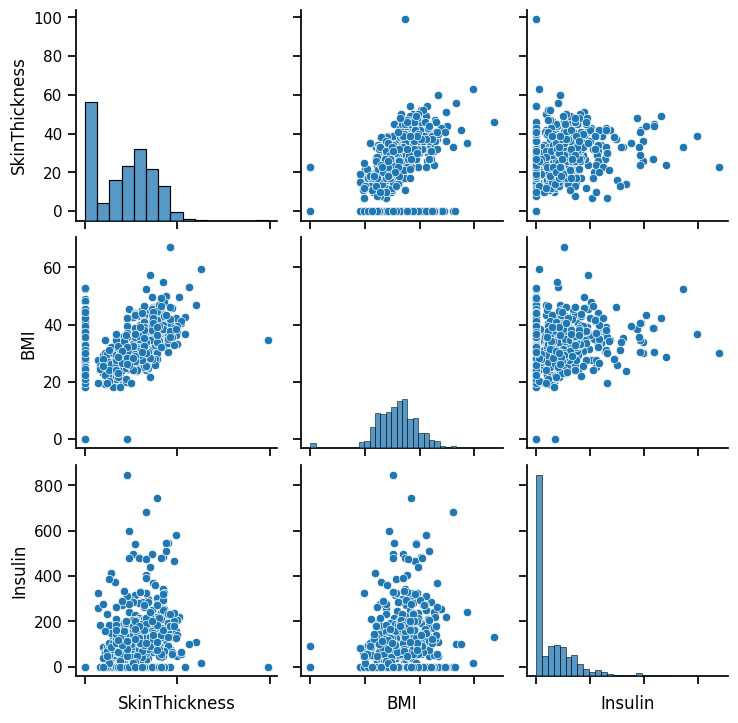

In [73]:
with sns.plotting_context("notebook"):
    g = sns.pairplot(df[['SkinThickness', 'BMI', 'Insulin']])
g.set(xticklabels=[]);